In [1]:
% matplotlib inline

There's a good stackplot example [here](http://matplotlib.org/examples/pylab_examples/stackplot_demo.html) and an alternative histogram stacking method [here](http://matplotlib.org/examples/pylab_examples/bar_stacked.html).

## Making a stackplot

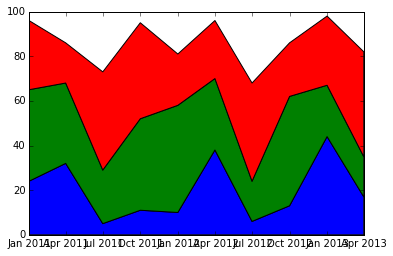

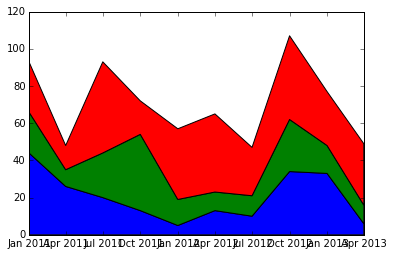

In [4]:
fnx = lambda : np.random.randint(5, 50, 10)
y = np.row_stack((fnx(), fnx(), fnx()))
x = np.arange(10)

x = [datetime.datetime(2011, 1, 1),
     datetime.datetime(2011, 4, 1),
     datetime.datetime(2011, 7, 1),
     datetime.datetime(2011, 10, 1),
     datetime.datetime(2012, 1, 1),
     datetime.datetime(2012, 4, 1),
     datetime.datetime(2012, 7, 1),
     datetime.datetime(2012, 10, 1),
     datetime.datetime(2013, 1, 1),
     datetime.datetime(2013, 4, 1)]

y1, y2, y3 = fnx(), fnx(), fnx()

fig, ax = plt.subplots()
ax.stackplot(x, y)
ax.xaxis_date()
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3)
ax.xaxis_date()
plt.show()

## Grouping along the time axis

[This](http://stackoverflow.com/questions/14569223/timegrouper-pandas) is a good example of the pandas TimeGrouper

In [28]:
def read_dates(infile):
    """Read a file of dates (one per line) and write to a list."""

    fin = open(infile, 'r')
    date_list = []
    for line in fin:
        date_list.append(line.rstrip('\n'))
    fin.close()

    return date_list

In [29]:
date_list = read_dates('dates_zw_ampmedian90pct-w19_env-va_ERAInterim_500hPa_030day-runmean_native-mermax.txt')

print date_list[0:5]

['1979-03-18', '1979-03-19', '1979-03-20', '1979-03-21', '1979-03-22']


In [30]:
import pandas
import datetime
import numpy

data = numpy.ones(len(date_list))
test_df = pandas.DataFrame(data, index=map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'), date_list))

In [31]:
test_df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[1979-03-18, ..., 2014-05-04]
Length: 1291, Freq: None, Timezone: None

In [32]:
print test_df

            0
1979-03-18  1
1979-03-19  1
1979-03-20  1
1979-03-21  1
1979-03-22  1
1979-03-23  1
1979-03-24  1
1979-03-25  1
1979-03-26  1
1979-03-27  1
1979-03-28  1
1979-03-31  1
1979-04-03  1
1979-05-27  1
1979-05-28  1
1979-05-29  1
1979-06-18  1
1979-06-19  1
1979-07-23  1
1979-07-24  1
1979-07-25  1
1979-07-26  1
1979-07-27  1
1979-09-05  1
1979-09-06  1
1979-09-07  1
1980-02-02  1
1980-02-03  1
1980-02-04  1
1980-02-05  1
...        ..
2012-08-23  1
2013-03-23  1
2013-03-24  1
2013-03-25  1
2013-03-26  1
2014-03-20  1
2014-03-21  1
2014-03-22  1
2014-04-13  1
2014-04-14  1
2014-04-15  1
2014-04-16  1
2014-04-17  1
2014-04-18  1
2014-04-19  1
2014-04-20  1
2014-04-21  1
2014-04-22  1
2014-04-23  1
2014-04-24  1
2014-04-25  1
2014-04-26  1
2014-04-27  1
2014-04-28  1
2014-04-29  1
2014-04-30  1
2014-05-01  1
2014-05-02  1
2014-05-03  1
2014-05-04  1

[1291 rows x 1 columns]


In [33]:
from pandas.tseries.resample import TimeGrouper

seasonal_data = test_df.groupby(TimeGrouper(freq='3M', closed='left')).sum()

In [34]:
seasonal_data.fillna(0, inplace=True)
print seasonal_data

             0
1979-05-31  16
1979-08-31   7
1979-11-30   3
1980-02-29  24
1980-05-31  54
1980-08-31  33
1980-11-30   0
1981-02-28   0
1981-05-31  20
1981-08-31  38
1981-11-30   0
1982-02-28   0
1982-05-31  12
1982-08-31  26
1982-11-30   0
1983-02-28   4
1983-05-31   5
1983-08-31   0
1983-11-30   0
1984-02-29   0
1984-05-31  20
1984-08-31   7
1984-11-30  16
1985-02-28   0
1985-05-31   0
1985-08-31   3
1985-11-30  17
1986-02-28   0
1986-05-31   3
1986-08-31  17
...         ..
2007-02-28   1
2007-05-31   0
2007-08-31  40
2007-11-30   0
2008-02-29   0
2008-05-31   3
2008-08-31   8
2008-11-30  24
2009-02-28   0
2009-05-31  12
2009-08-31  33
2009-11-30   8
2010-02-28   9
2010-05-31   0
2010-08-31   3
2010-11-30  24
2011-02-28   9
2011-05-31   6
2011-08-31  35
2011-11-30   0
2012-02-29   0
2012-05-31   9
2012-08-31   9
2012-11-30   0
2013-02-28   0
2013-05-31   4
2013-08-31   0
2013-11-30   0
2014-02-28   0
2014-05-31  25

[141 rows x 1 columns]


In [39]:
start = '1979-12-01'
end = '2013-11-30'

datetime_start = datetime.datetime.strptime(start, '%Y-%m-%d')
start_selection = test_df.index >= datetime_start

datetime_end = datetime.datetime.strptime(end, '%Y-%m-%d')
end_selection = test_df.index <= datetime_end

combined_selection = start_selection & end_selection

In [43]:
print combined_selection[0:30]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True]


In [44]:
print combined_selection[-30:-1]

[ True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


In [45]:
new_df = test_df[combined_selection]

In [46]:
print new_df

            0
1980-02-02  1
1980-02-03  1
1980-02-04  1
1980-02-05  1
1980-02-06  1
1980-02-07  1
1980-02-08  1
1980-02-09  1
1980-02-10  1
1980-02-11  1
1980-02-12  1
1980-02-13  1
1980-02-14  1
1980-02-15  1
1980-02-16  1
1980-02-17  1
1980-02-18  1
1980-02-19  1
1980-02-20  1
1980-02-21  1
1980-02-22  1
1980-02-23  1
1980-02-24  1
1980-02-25  1
1980-03-20  1
1980-03-21  1
1980-03-22  1
1980-03-25  1
1980-03-26  1
1980-03-27  1
...        ..
2011-08-17  1
2011-08-18  1
2011-08-19  1
2011-08-20  1
2011-08-21  1
2011-08-22  1
2011-08-23  1
2011-08-24  1
2012-04-11  1
2012-04-12  1
2012-04-13  1
2012-04-26  1
2012-04-27  1
2012-04-28  1
2012-04-29  1
2012-04-30  1
2012-05-01  1
2012-08-15  1
2012-08-16  1
2012-08-17  1
2012-08-18  1
2012-08-19  1
2012-08-20  1
2012-08-21  1
2012-08-22  1
2012-08-23  1
2013-03-23  1
2013-03-24  1
2013-03-25  1
2013-03-26  1

[1240 rows x 1 columns]


In [47]:
test_df.reindex?

In [49]:
idx = pandas.date_range('1979-12-01', '2013-11-30')
final_df = new_df.reindex(idx, fill_value=0)

In [57]:
print final_df[-250:-200]

            0
2013-03-26  1
2013-03-27  0
2013-03-28  0
2013-03-29  0
2013-03-30  0
2013-03-31  0
2013-04-01  0
2013-04-02  0
2013-04-03  0
2013-04-04  0
2013-04-05  0
2013-04-06  0
2013-04-07  0
2013-04-08  0
2013-04-09  0
2013-04-10  0
2013-04-11  0
2013-04-12  0
2013-04-13  0
2013-04-14  0
2013-04-15  0
2013-04-16  0
2013-04-17  0
2013-04-18  0
2013-04-19  0
2013-04-20  0
2013-04-21  0
2013-04-22  0
2013-04-23  0
2013-04-24  0
2013-04-25  0
2013-04-26  0
2013-04-27  0
2013-04-28  0
2013-04-29  0
2013-04-30  0
2013-05-01  0
2013-05-02  0
2013-05-03  0
2013-05-04  0
2013-05-05  0
2013-05-06  0
2013-05-07  0
2013-05-08  0
2013-05-09  0
2013-05-10  0
2013-05-11  0
2013-05-12  0
2013-05-13  0
2013-05-14  0
